Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

In [1]:
import math
def f(x):
    return  math.sin(x / 5.) * math.exp(x / 10.) + 5. * math.exp(-x / 2.)

In [2]:
x = range(1,16)

In [3]:
y = map(f, x)

In [4]:
from matplotlib import pylab as plt
%matplotlib inline

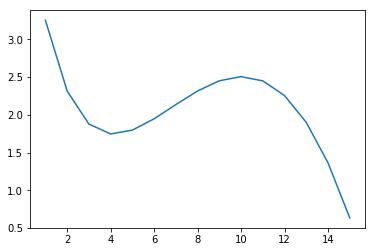

In [5]:
plt.plot(x,y)

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [7]:
import numpy as np
A = np.array([[1, 1],[1,15]])

In [8]:
A

array([[ 1,  1],
       [ 1, 15]])

In [12]:
b = np.array([f(1), f(15)])

In [13]:
b

array([ 3.25221687,  0.63522142])

In [14]:
w = np.linalg.solve(A, b)

In [15]:
w

array([ 3.43914511, -0.18692825])

In [16]:
x = [1, 15]

In [17]:
y = map(f,x)

In [18]:
y

[3.252216865271419, 0.6352214195786656]

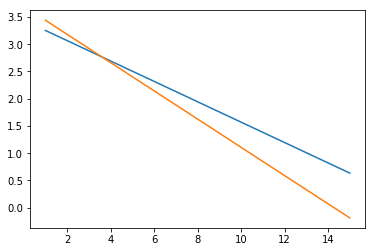

In [19]:
plt.plot(x,y, x,w)
    

Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [36]:
A = np.array([[1,1,1],[1,8,(8**2)],[1,15,(15**2)]])
A

array([[  1,   1,   1],
       [  1,   8,  64],
       [  1,  15, 225]])

In [37]:
b = np.array([f(1), f(8), f(15)])
b

array([ 3.25221687,  2.31617016,  0.63522142])

In [39]:
w = np.linalg.solve(A, b)
w

array([ 3.32512949, -0.06531159, -0.00760104])

In [43]:
x = [1., 8., 15.]
y = map(f,x)

a = np.array([[3,2,0],[1,-1,0],[0,5,1]])
b = np.array([2,4,-1])
x = np.linalg.somlve(a,b)
x

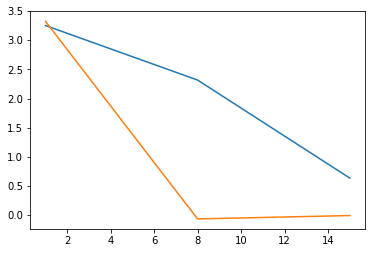

In [44]:
plt.plot(x,y, x,w)

Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)


In [45]:
A = np.array([[1,1,1,1],[1,4,(4**2),(4**3)],[1,10,(10**2),(10**3)],
             [1,15,(15**2),(15**3)]])

In [46]:
A

array([[   1,    1,    1,    1],
       [   1,    4,   16,   64],
       [   1,   10,  100, 1000],
       [   1,   15,  225, 3375]])

In [47]:
b = ([f(1),f(4),f(10),f(15)])

In [48]:
w = np.linalg.solve(A, b)

In [49]:
w

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [50]:
x = [1,4,10,14]

In [51]:
y = map(f, x)

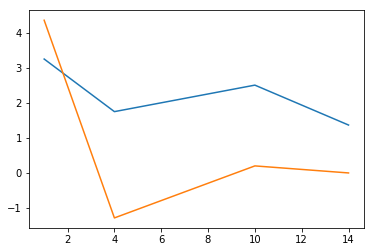

In [52]:
plt.plot(x,y, x,w)

Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).


In [57]:
with open("submission-2.txt","w") as outFile:
     outFile.writelines(ws + ' ' for ws in  map(str, w[0:]))

In [58]:
!cat submission-2.txt

4.36264153512 -1.29552586569 0.193336847022 -0.00823565117332 